<a href="https://colab.research.google.com/github/akinzayn/AST509/blob/main/AST_509_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman")
library(pacman)

In [ ]:
system("sudo apt-get install jags")

In [ ]:
p_load(tidyverse, rjags, googledrive,modeest)

In [ ]:
drive_deauth()
public_file = drive_get(as_id('1ORPVwWxqjwEfBZAZ2HgvZs6nV2bn_9SG'))
drive_download(public_file, overwrite=T)

In [ ]:
nm_providers = load('nm_providers.Rdata')
nm_providers

In [ ]:
dim(brfss)
head(brfss)
cat("\n\n")
dim(county_data)
head(county_data)


Response: visit last year (bernoulli prior since two outcomes)

Predictors: age (gaussian prior ), providers (beta prior)

In [ ]:
summary(county_data$providers)

In [ ]:
c_age = brfss$age - mean(brfss$age)

In [ ]:
data_df = list(y = brfss$visit_lastyr, age = c_age, providers= county_data$providers,
id =brfss$county_index, n = nrow(brfss), N = nrow(county_data))
head(data_df)

In [ ]:
cat("model{
  for (j in 1:n){
    y[j] ~ dbin(p[j],1)
    logit(p[j]) = a[id[j]] + bage * age[j] 
  }
for(i in 1:N ){
  a[i] ~ dnorm(nu[i], tau_a)
  nu[i] = a0 + aproviders * providers[i]
}

bage ~ dnorm(0, 0.001)
a0 ~ dnorm(0, 0.001)
aproviders ~ dnorm(0,0.001)

tau_a = pow(sigma_a, -2)
sigma_a ~ dexp(0.001)
}" , file = "prescribmodel.txt")


In [ ]:
model_1 = jags.model(file = "prescribmodel.txt", data = data_df, n.chain =3,
n.adapt = 1000 )

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 8888
   Unobserved stochastic nodes: 28
   Total graph size: 29888

Initializing model



In [ ]:
model_1_sample = coda.samples(model_1, n.iter = 50000, variable.names=c('a0','bage','aproviders'))

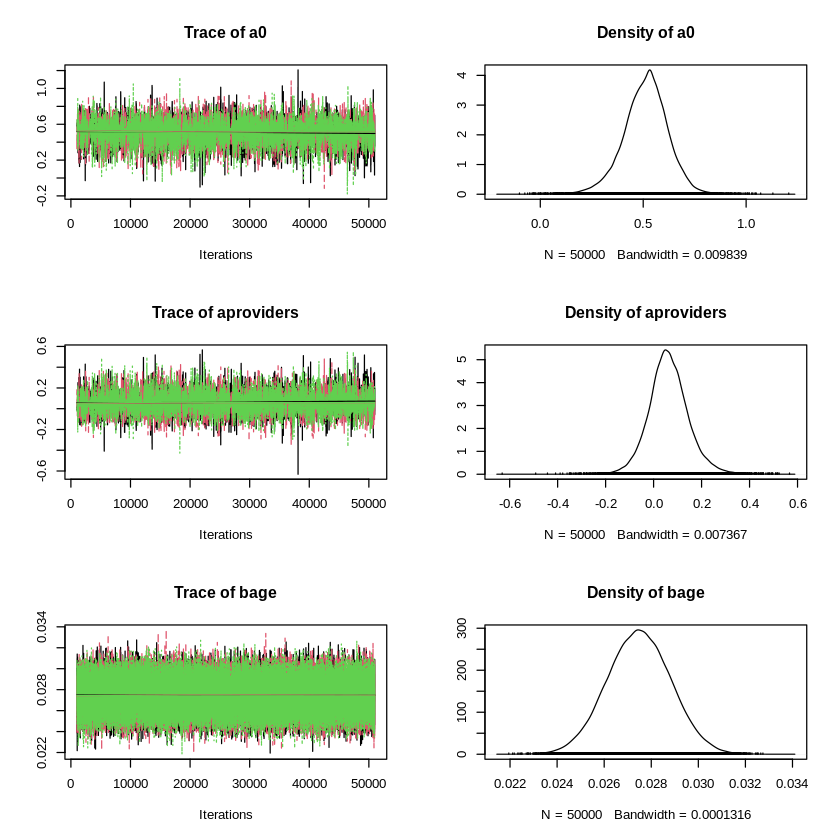

In [ ]:
plot(model_1_sample)

In [ ]:
HPDinterval(model_1_sample)

,lower,upper
a0,0.28932878,0.72512089
aproviders,-0.10060071,0.23411041
bage,0.02489049,0.03015486
,lower,upper
a0,0.30598045,0.72185943
aproviders,-0.10304876,0.22199569
bage,0.02482665,0.03011998
,lower,upper
a0,0.28525623,0.72975610
aproviders,-0.10426539,0.24183917


In [ ]:
sum = summary(model_1_sample)


Iterations = 1001:51000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean       SD  Naive SE Time-series SE
a0         0.51139 0.108380 2.798e-04      1.615e-03
aproviders 0.06252 0.083280 2.150e-04      1.217e-03
bage       0.02748 0.001347 3.477e-06      4.873e-06

2. Quantiles for each variable:

               2.5%     25%     50%     75%   97.5%
a0          0.28109 0.44594 0.51659 0.58082 0.71523
aproviders -0.09742 0.01069 0.05972 0.11169 0.23890
bage        0.02484 0.02657 0.02748 0.02839 0.03012
